In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [109]:
from pathlib import Path
from astropy.io import fits
import os
from fast_histogram import histogram, histogram2d
from matplotlib import animation
from IPython.display import HTML # requires ffmpeg
from astropy.wcs import WCS
from astropy.time import Time

In [17]:
skypos = (352.9378,-2.7447) # position of AF Psc

In [3]:
tess_path = '/Volumes/MERTOOLS/AFPSC/TESS/'
swift_path = '/Volumes/MERTOOLS/AFPSC/Swift/'

In [4]:
event_files = []
for visit in os.listdir(swift_path):
    if visit == '00087201006': # Does not have event data
        continue
    if visit == '00014769003': # Does not have data
        continue
    visit_path = swift_path+visit+'/'
    for img in os.listdir(visit_path+'uvot/event/'):
        fn=visit_path+'uvot/event/'+img
#        data = fits.open(fn)
        event_files+=[fn]
        # Plot a crude light curve
#        plt.figure(figsize=(15,3))
#        plt.title(visit)
#        raw_expt = np.floor(data[0].header['TSTOP']-data[0].header['TSTART'])
#        events = data[1].data
#        gcr = len(events['TIME']/raw_expt)
#        lc,_=histogram(events['TIME'],bins=int(raw_expt/10))
#        plt.errorbar(np.arange(len(lc)),lc,yerr=3*np.sqrt(lc))
        #plt.ylim([gcr,2*gcr])
        
        # Plot a full depth image
#        plt.figure(figsize=(10,10))
#        plt.figure(figsize=(10,10))
#        img = histogram2d(events['X'],events['Y'],bins=800,range=[[events['X'].min(),events['X'].max()],
#                                                                      [events['Y'].min(),events['Y'].max()]])
#        plt.imshow(np.log10(img))
print(len(event_files))

27


/Volumes/MERTOOLS/AFPSC/Swift/00014769002/uvot/event/sw00014769002uuuw1po_uf.evt.gz
/Volumes/MERTOOLS/AFPSC/Swift/00014769007/uvot/event/sw00014769007uuuw1po_uf.evt.gz
/Volumes/MERTOOLS/AFPSC/Swift/00014769028/uvot/event/sw00014769028uuuw1po_uf.evt.gz
/Volumes/MERTOOLS/AFPSC/Swift/00014769010/uvot/event/sw00014769010uuuw1po_uf.evt.gz
/Volumes/MERTOOLS/AFPSC/Swift/00014769016/uvot/event/sw00014769016uuuw1po_uf.evt.gz
/Volumes/MERTOOLS/AFPSC/Swift/00014769018/uvot/event/sw00014769018uuuw1po_uf.evt.gz
/Volumes/MERTOOLS/AFPSC/Swift/00014769025/uvot/event/sw00014769025uuuw1po_uf.evt.gz
/Volumes/MERTOOLS/AFPSC/Swift/00014769006/uvot/event/sw00014769006uuuw1po_uf.evt.gz
/Volumes/MERTOOLS/AFPSC/Swift/00014769013/uvot/event/sw00014769013uuuw1po_uf.evt.gz
/Volumes/MERTOOLS/AFPSC/Swift/00014769026/uvot/event/sw00014769026uuuw1po_uf.evt.gz
/Volumes/MERTOOLS/AFPSC/Swift/00014769014/uvot/event/sw00014769014uuuw1po_uf.evt.gz
/Volumes/MERTOOLS/AFPSC/Swift/00014769022/uvot/event/sw00014769022uuuw1po_uf

/var/folders/pm/szdr5c1j3vz19xvrxpps_wfc0000gn/T/ipykernel_10046/3359815823.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,3))


/Volumes/MERTOOLS/AFPSC/Swift/00014769024/uvot/event/sw00014769024uuuw1po_uf.evt.gz
/Volumes/MERTOOLS/AFPSC/Swift/00014769027/uvot/event/sw00014769027uuuw1po_uf.evt.gz
/Volumes/MERTOOLS/AFPSC/Swift/00014769004/uvot/event/sw00014769004uuuw1po_uf.evt.gz
/Volumes/MERTOOLS/AFPSC/Swift/00014769008/uvot/event/sw00014769008uuuw1po_uf.evt.gz
/Volumes/MERTOOLS/AFPSC/Swift/00014769009/uvot/event/sw00014769009uuuw1po_uf.evt.gz
/Volumes/MERTOOLS/AFPSC/Swift/00014769020/uvot/event/sw00014769020uuuw1po_uf.evt.gz


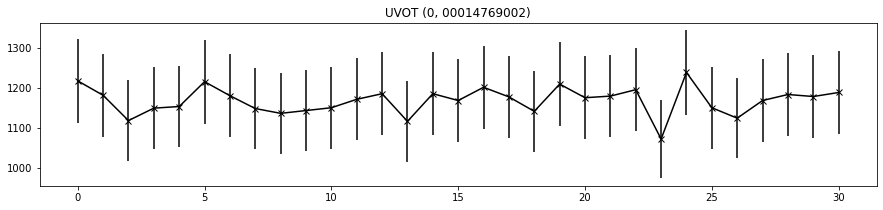

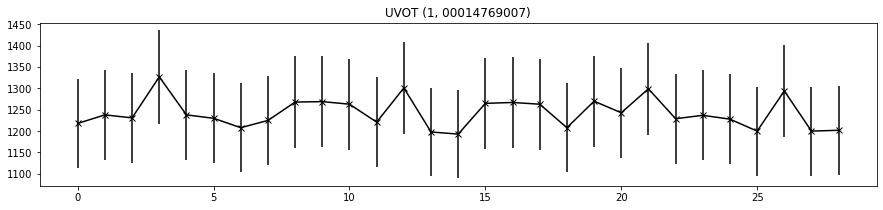

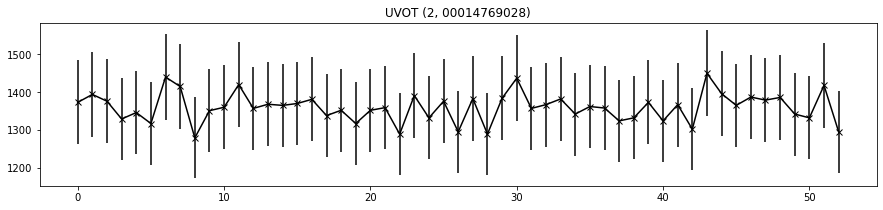

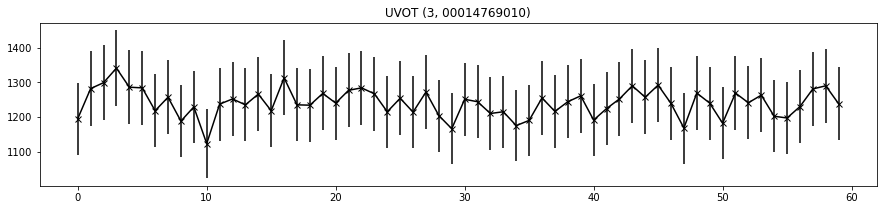

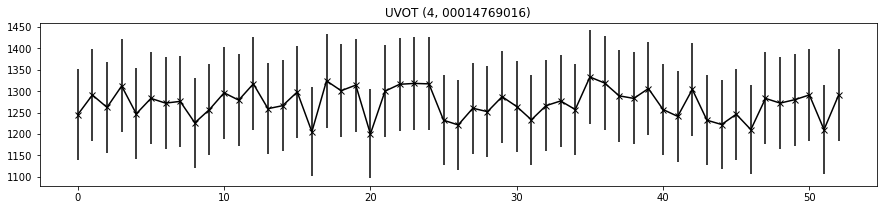

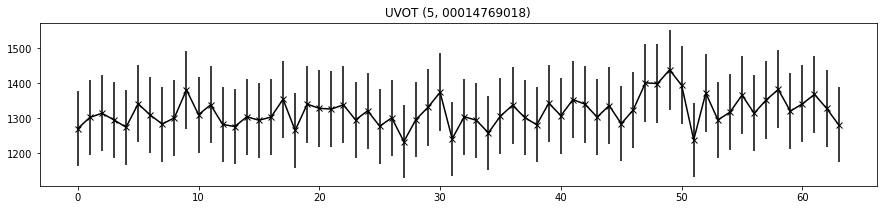

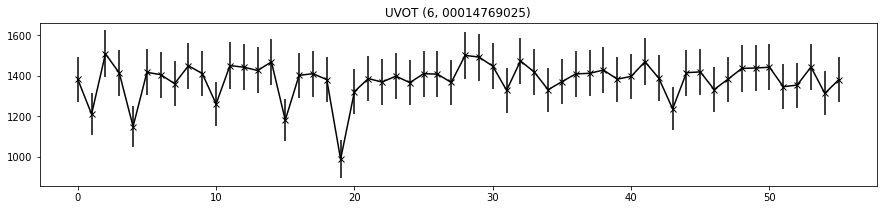

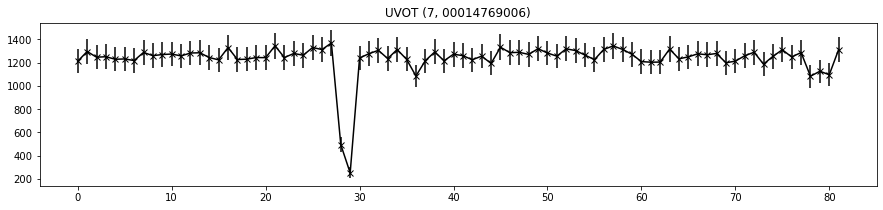

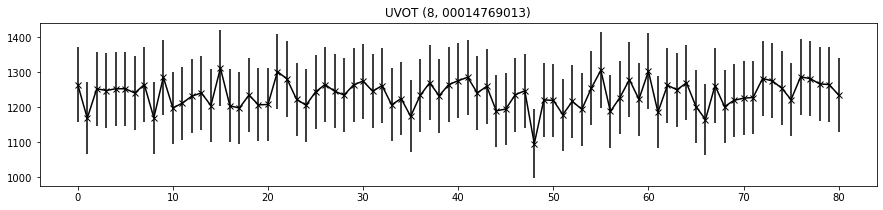

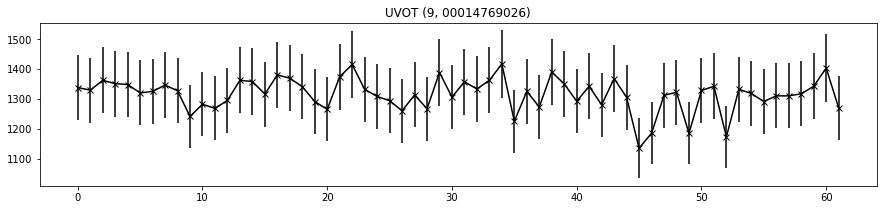

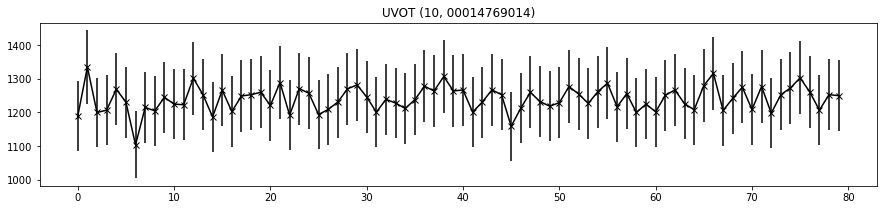

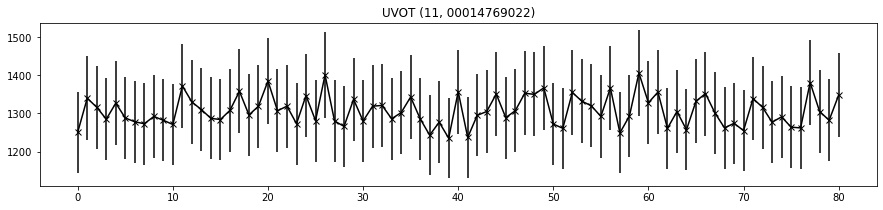

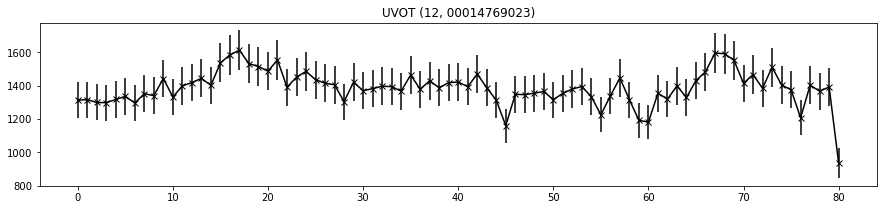

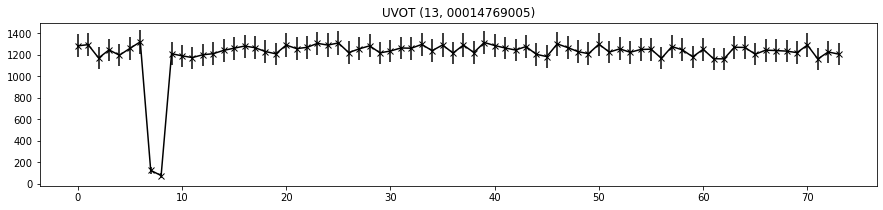

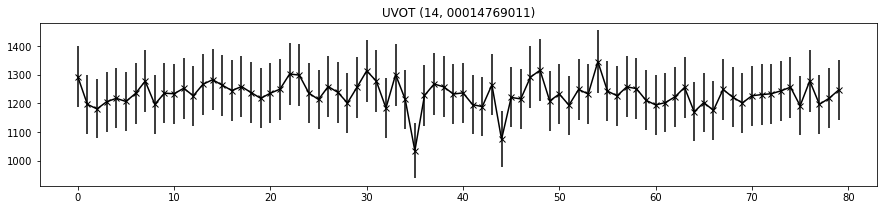

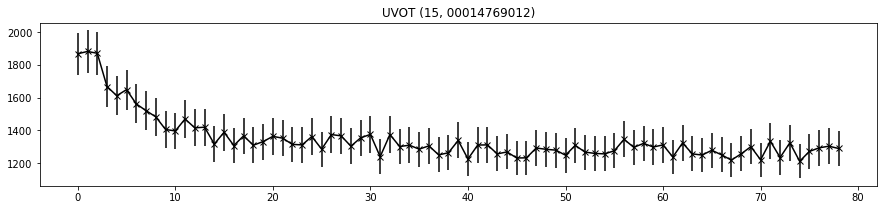

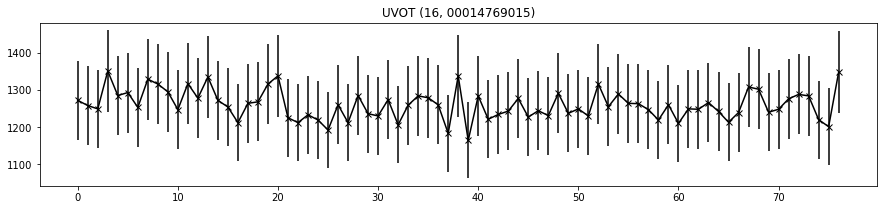

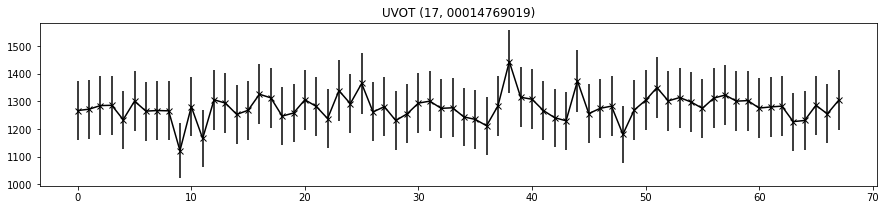

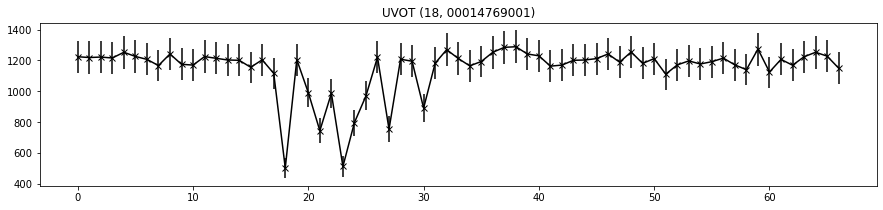

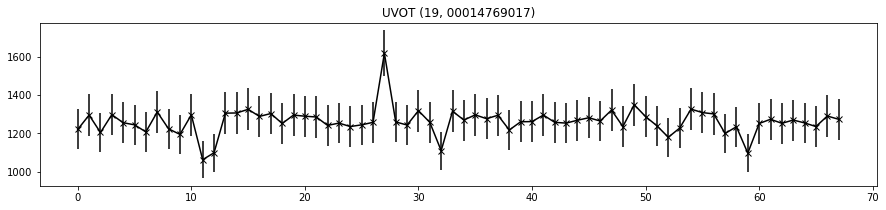

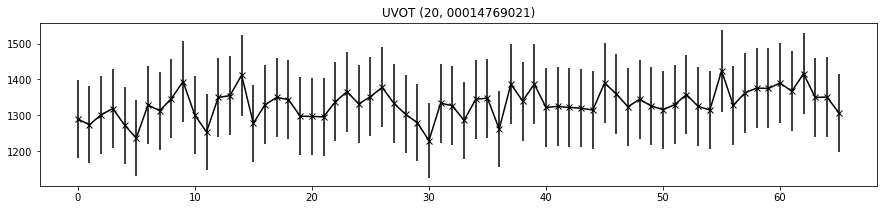

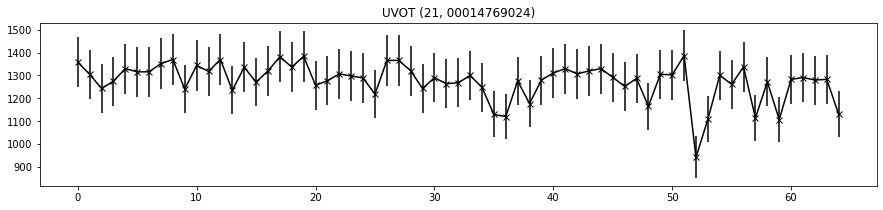

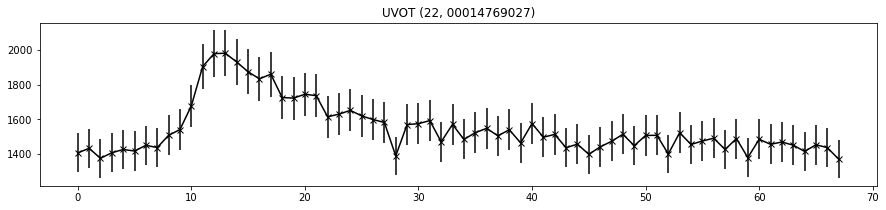

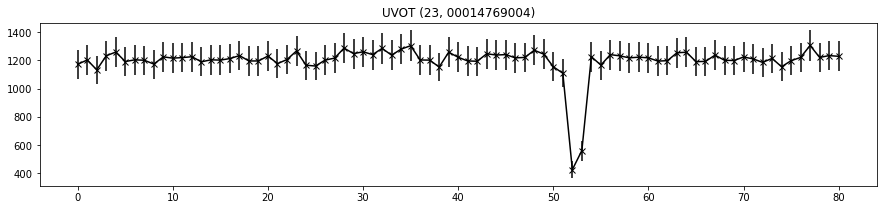

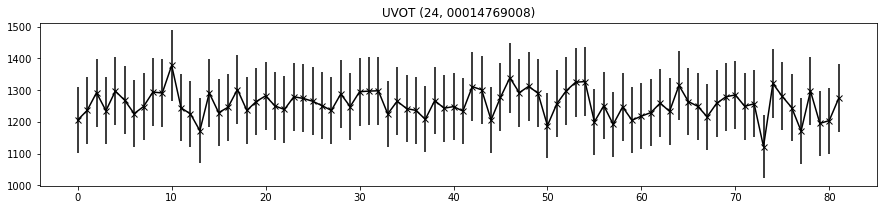

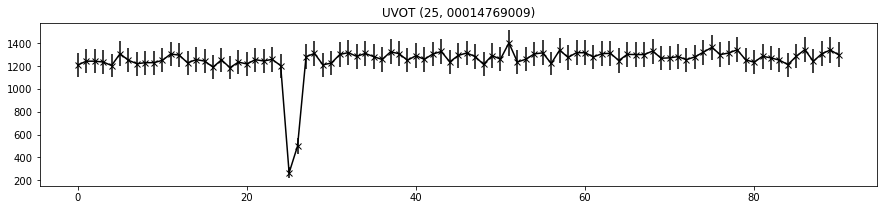

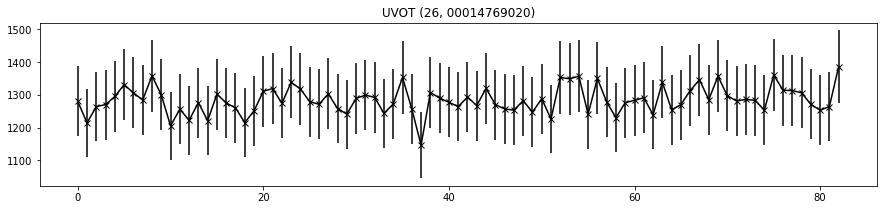

In [84]:
for j,fn in enumerate(event_files):
    f = fits.open(fn)
    print(fn)
    data = fits.open(fn)
    events = data[1].data
    t=np.array(events['TIME'])
    x=np.array(events['X'])
    y=np.array(events['Y'])

    ra=(x-data[1].header['TCRPX6'])*data[1].header['TCDLT6']+data[1].header['TCRVL6']
    dec=(y-data[1].header['TCRPX7'])*data[1].header['TCDLT7']+data[1].header['TCRVL7']

    ix=np.digitize(t,np.arange(t.min(),t.max(),20))

    margin = 0.01 # degrees

    #fig = plt.figure(figsize=(10,10))
    #plt.title(f"UVOT ({fn.split('/')[5]})")
    #plt.xticks([])
    #plt.yticks([])
    #plt.tight_layout()

    ims = []
    lc = []
    for i in np.unique(ix)[:-1]:
        frame = histogram2d(ra[np.where(ix==i)],
                            dec[np.where(ix==i)],
                            bins=133,
                            range=[[skypos[0]-margin,skypos[0]+margin],
                                   [skypos[1]-margin,skypos[1]+margin]])
        lc+=[frame.sum()]
    #    ims.append([plt.imshow(np.log10(frame),cmap="Greys")])

    plt.figure(figsize=(15,3))
    plt.title(f"UVOT ({j}, {fn.split('/')[5]})")
    plt.errorbar(np.arange(len(lc)),lc,yerr=3*np.sqrt(lc),fmt='kx-')

    #ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat=True)

    #HTML(ani.to_html5_video())


['2021-09-09T10:33:00.000' '2021-09-09T10:55:55.000']


/var/folders/pm/szdr5c1j3vz19xvrxpps_wfc0000gn/T/ipykernel_10046/3339698408.py:31: RuntimeWarning: divide by zero encountered in true_divide
  ims.append([plt.imshow(1/np.sqrt(frame),cmap="Greys_r")])


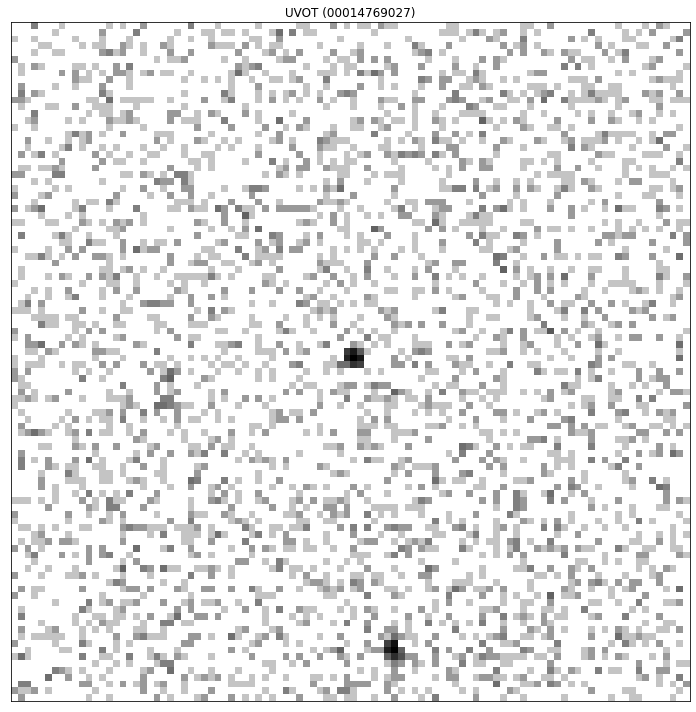

In [134]:
fn = event_files[22]
f = fits.open(fn)
data = fits.open(fn)
obstimes = Time([data[0].header['DATE-OBS'],data[0].header['DATE-END']], format='isot', scale='utc')
print(obstimes)
events = data[1].data
t=np.array(events['TIME'])
x=np.array(events['X'])
y=np.array(events['Y'])

ra=(x-data[1].header['TCRPX6'])*data[1].header['TCDLT6']+data[1].header['TCRVL6']
dec=(y-data[1].header['TCRPX7'])*data[1].header['TCDLT7']+data[1].header['TCRVL7']

ix=np.digitize(t,np.arange(t.min(),t.max(),20))

margin = 0.03 # degrees

fig = plt.figure(figsize=(10,10))
plt.title(f"UVOT ({fn.split('/')[5]})")
plt.xticks([])
plt.yticks([])
plt.tight_layout()

ims = []
for i in np.unique(ix)[:-1]:
    frame = histogram2d(ra[np.where(ix==i)],
                        dec[np.where(ix==i)],
                        bins=100,
                        range=[[skypos[0]-margin,skypos[0]+margin],
                               [skypos[1]-margin,skypos[1]+margin]])
    ims.append([plt.imshow(1/np.sqrt(frame),cmap="Greys_r")])
    
ani = animation.ArtistAnimation(fig, ims, interval=100, blit=True, repeat=True)

HTML(ani.to_html5_video())



In [135]:
len(ims)

68

In [116]:
obstimes.mjd+ 2400000.5 

array([2459466.93958333, 2459466.95549769])

In [97]:
tess_fn = '/Volumes/MERTOOLS/AFPSC/TESS/tess2021232031932-s0042-0000000250081915-0213-a_fast-lc.fits'
tess_data = fits.open(tess_fn)

In [105]:
tess_data[1].data

FITS_rec([(2447.68999325, 0.00527694, 5271395, nan, nan, nan, nan, nan, nan,   172, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
          (2447.69022474, 0.00527695, 5271396, nan, nan, nan, nan, nan, nan,   160, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
          (2447.69045624, 0.00527696, 5271397, nan, nan, nan, nan, nan, nan,   160, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
          ...,
          (2473.1654577 , 0.00575326, 5381447, nan, nan, nan, nan, nan, nan, 16384, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
          (2473.16568918, 0.00575326, 5381448, nan, nan, nan, nan, nan, nan, 16384, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan),
          (2473.16592066, 0.00575327, 5381449, nan, nan, nan, nan, nan, nan, 16384, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)],
         dtype=(numpy.record, [('TIME', '>f8'), ('TIMECORR', '>f4'), ('CADENCENO', '>i4'), ('SAP_FLUX', '>f4'), ('SAP_FLUX_ERR', '>f4'), ('SAP_BKG', '>f4'), ('SAP_BKG_ERR', '

(4000.0, 4400.0)

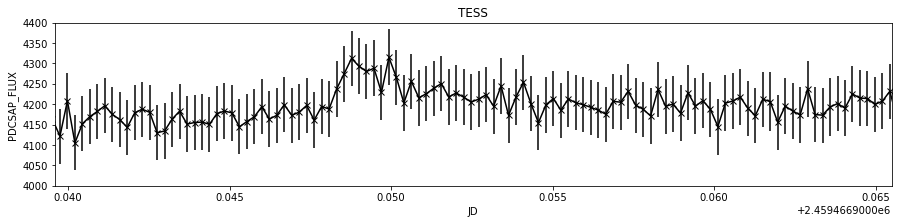

In [137]:
# BJD - 2457000
plt.figure(figsize=(15,3))
plt.title('TESS')
plt.errorbar(tess_data[1].data['TIME']+2457000,tess_data[1].data['PDCSAP_FLUX'],
             yerr=tess_data[1].data['PDCSAP_FLUX_ERR']*3,fmt='kx-')
plt.xlim([obstimes[0].mjd+ 2400000.5,obstimes[1].mjd+ 2400000.5+0.01])
plt.xlabel('JD')
plt.ylabel('PDCSAP_FLUX')
plt.ylim([4000,4400])